In [2]:
library(latex2exp)
library(repr)
library(ggplot2)
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Daniele Mellino 2013373

## Exercise 1
#### Track: 
A publishing company has recently launched a new journal.  In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them.  Out of 150 interviewed people, 29 have read the last issue of the journal.<br>
1. What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?
2. Assuming a uniform prior, what is the posterior distribution for y?
3. Plot both posterior and likelihood ditributions functions?

#### Solution:
#### 1.  What kind of distribution would you assume ?
I would assume for simplicity a binomial distribution because from the track we know that the people is chosen random and could or could not have read the journal.

So if p is the probability that a random person have read the journal and N is the number of people interviewed, the binomial distribution have parameter $p=\frac{29}{150}$ and   $N=150$.

Therefore:

$P(y|p,N,M)= \binom{N}{y}p^y(1-p)^{N-y}$


#### 2. Assuming a uniform prior, what is the posterior distribution for y?

Assuming an uniform prior $P(p|M)\sim \mathcal{U}(0,1)$ the posterior distribution for y is given by: <br>

$P(p|y,N,M)=\frac{P(y|p,N,M)P(p|M)}{P(y|N,M)} = \frac{1}{Z} p^y(1-p)^{N-y} $ 
<br>
With Z normalization term.

#### 3. Plot both posterior and likelihood 




[1] 1000

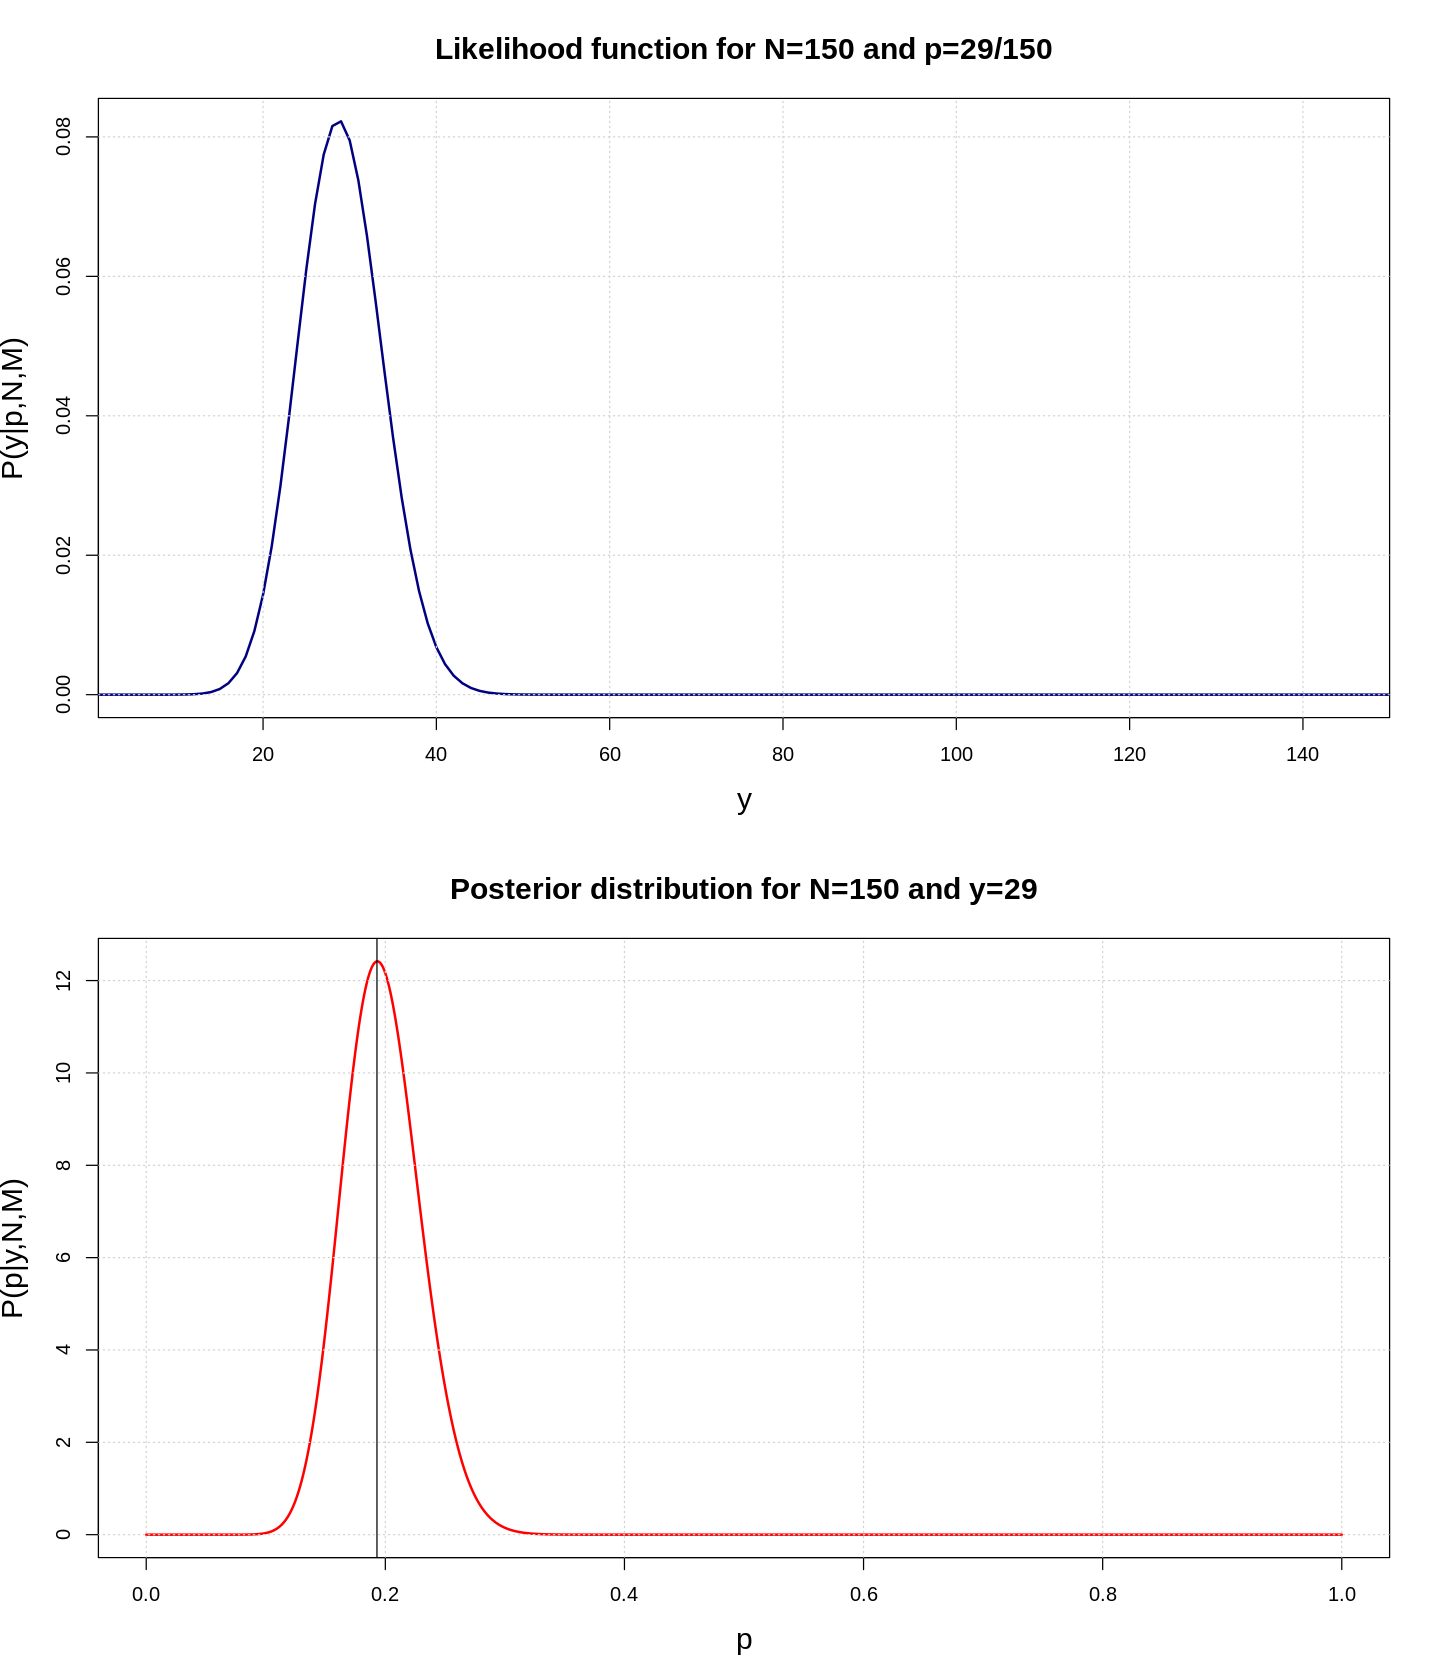

In [14]:
N<-150
y<-29
p<-y/N

x_pos <-seq(0,1,0.001)
x_lh<-1:N

#plot likelihood
options(repr.plot.width=12, repr.plot.height=14) 
par(mfrow=c(2,1))   #to make two plot one near to the other

plot(x_lh,dbinom(x_lh,size=N,prob=p),
     type='l', xlab='y',xaxs='i',
     col='navy',main="Likelihood function for N=150 and p=29/150",
    ylab='P(y|p,N,M)',lwd=2,
     cex.main=1.5,cex.lab=1.5)
grid()

#find normalization
K<-integrate(function(x){dbinom(y,N,x)}, lower=0, upper=1)$value
post<-dbinom(y, N, x_pos)/K
#plot posterior
plot(x_pos,post ,
     type='l', xlab='p',
     ylab='P(p|y,N,M)',cex.main=1.5,
     main='Posterior distribution for N=150 and y=29',
     col='red', lwd=2,cex.lab=1.5)
abline(v=x_pos[which.max(post)])
grid()


In [9]:
#using JAGS
library(rjags)
library(coda)


modelStr <- "model {
    # data likelihood
    for (i in 1:length(X)) {
        X[i]~dbern(p);
    }
    # a uniform prior for p
    p~dbeta(1, 1);
}"
model<-"Bernoulli_processex5.bug"
writeLines(modelStr , con=model)
X<-c(rep(0,150-29),rep(1,29) )
data <- NULL
data$X <- X     # Set of observations
data$n <- length(X)    # those to be considered
data$n_next <- 10      # Predictions
jm <- jags.model(model, data)
update(jm, 1000)
chain <- coda.samples(jm, c("p", "y"), n.iter=10000)
print(summary(chain))

Warning message in jags.model(model, data):
“Unused variable "n" in data”Warning message in jags.model(model, data):
“Unused variable "n_next" in data”

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 150
   Unobserved stochastic nodes: 1
   Total graph size: 152

Initializing model



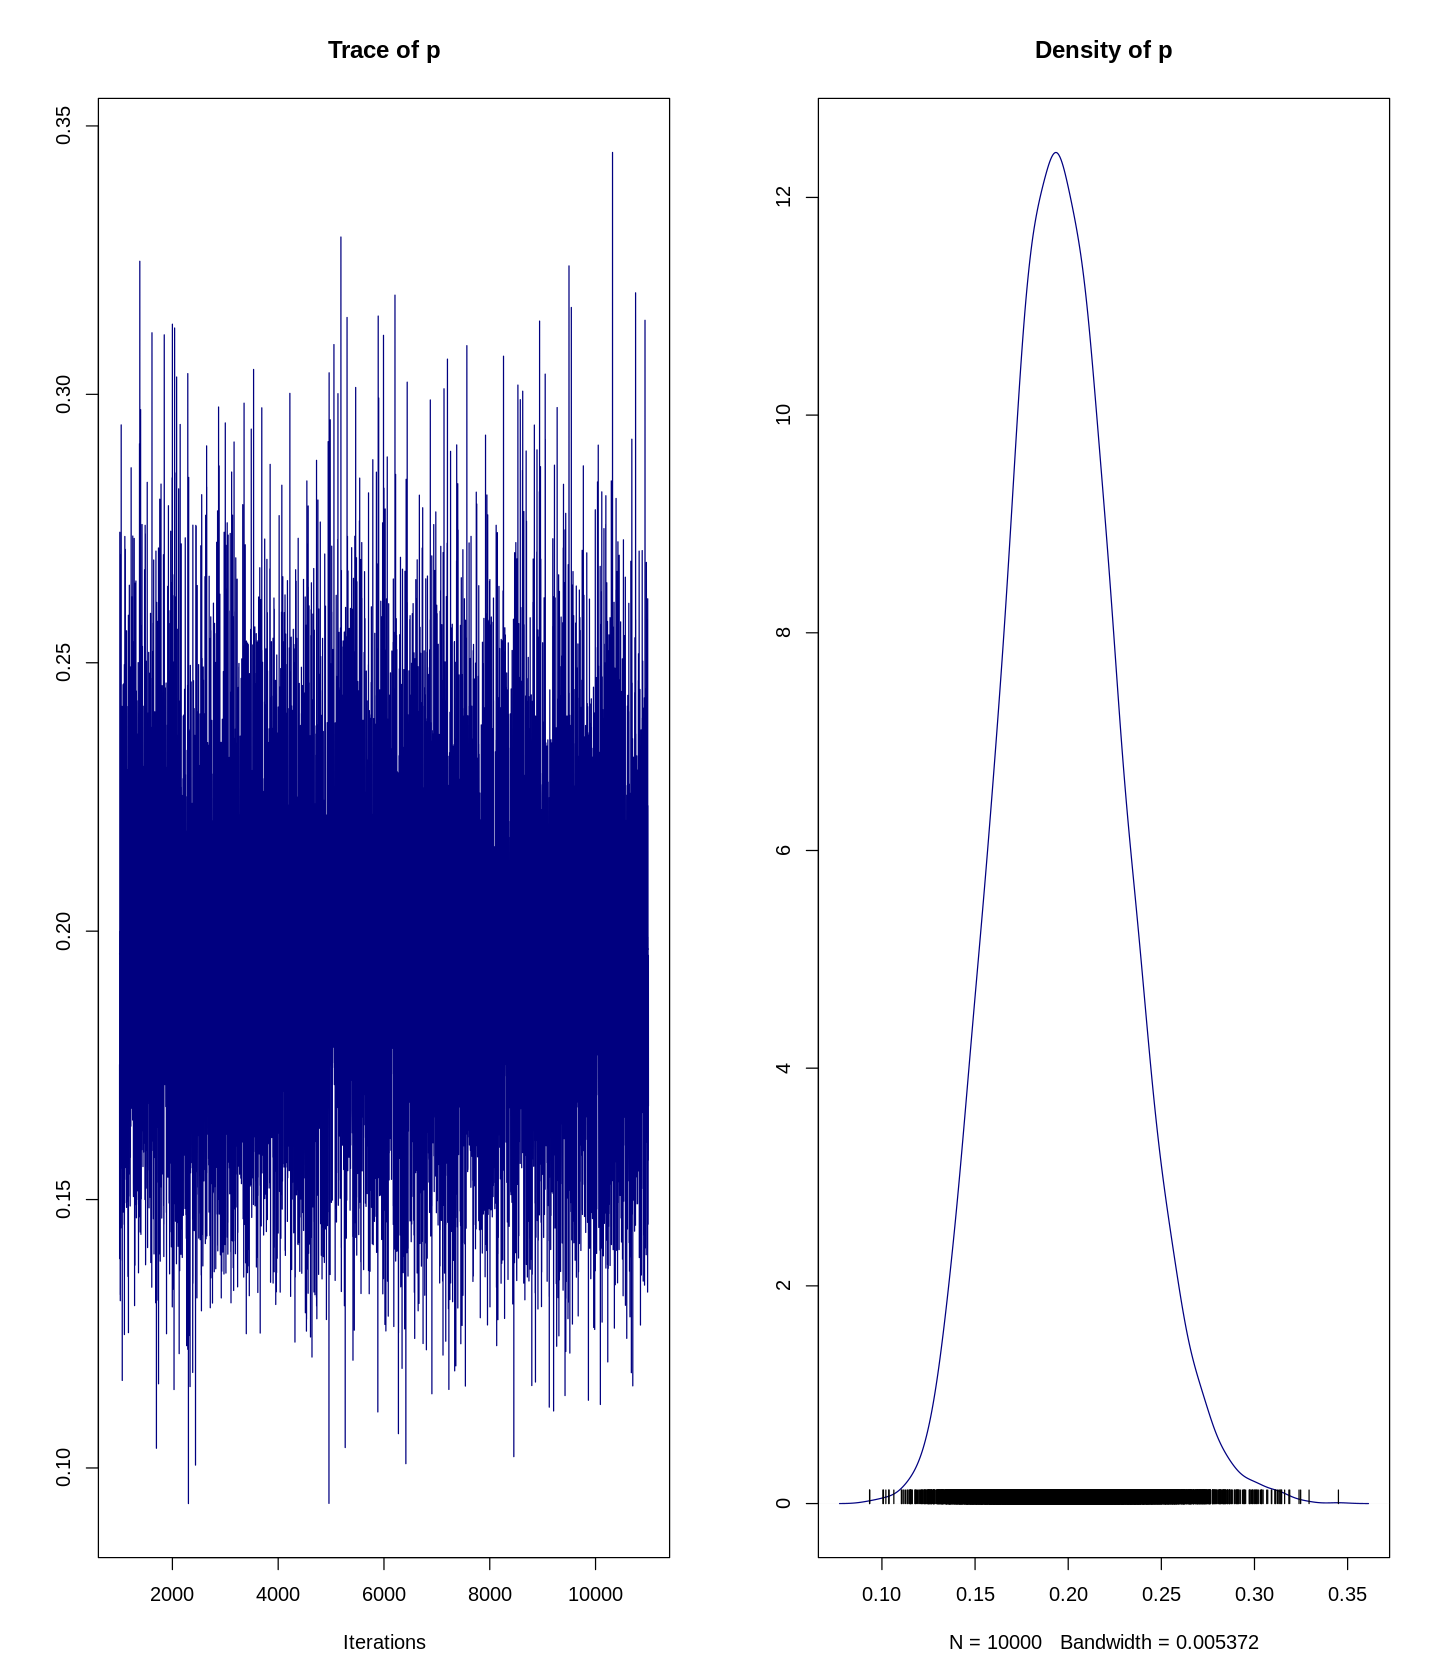

In [11]:
plot(chain,col="navy")

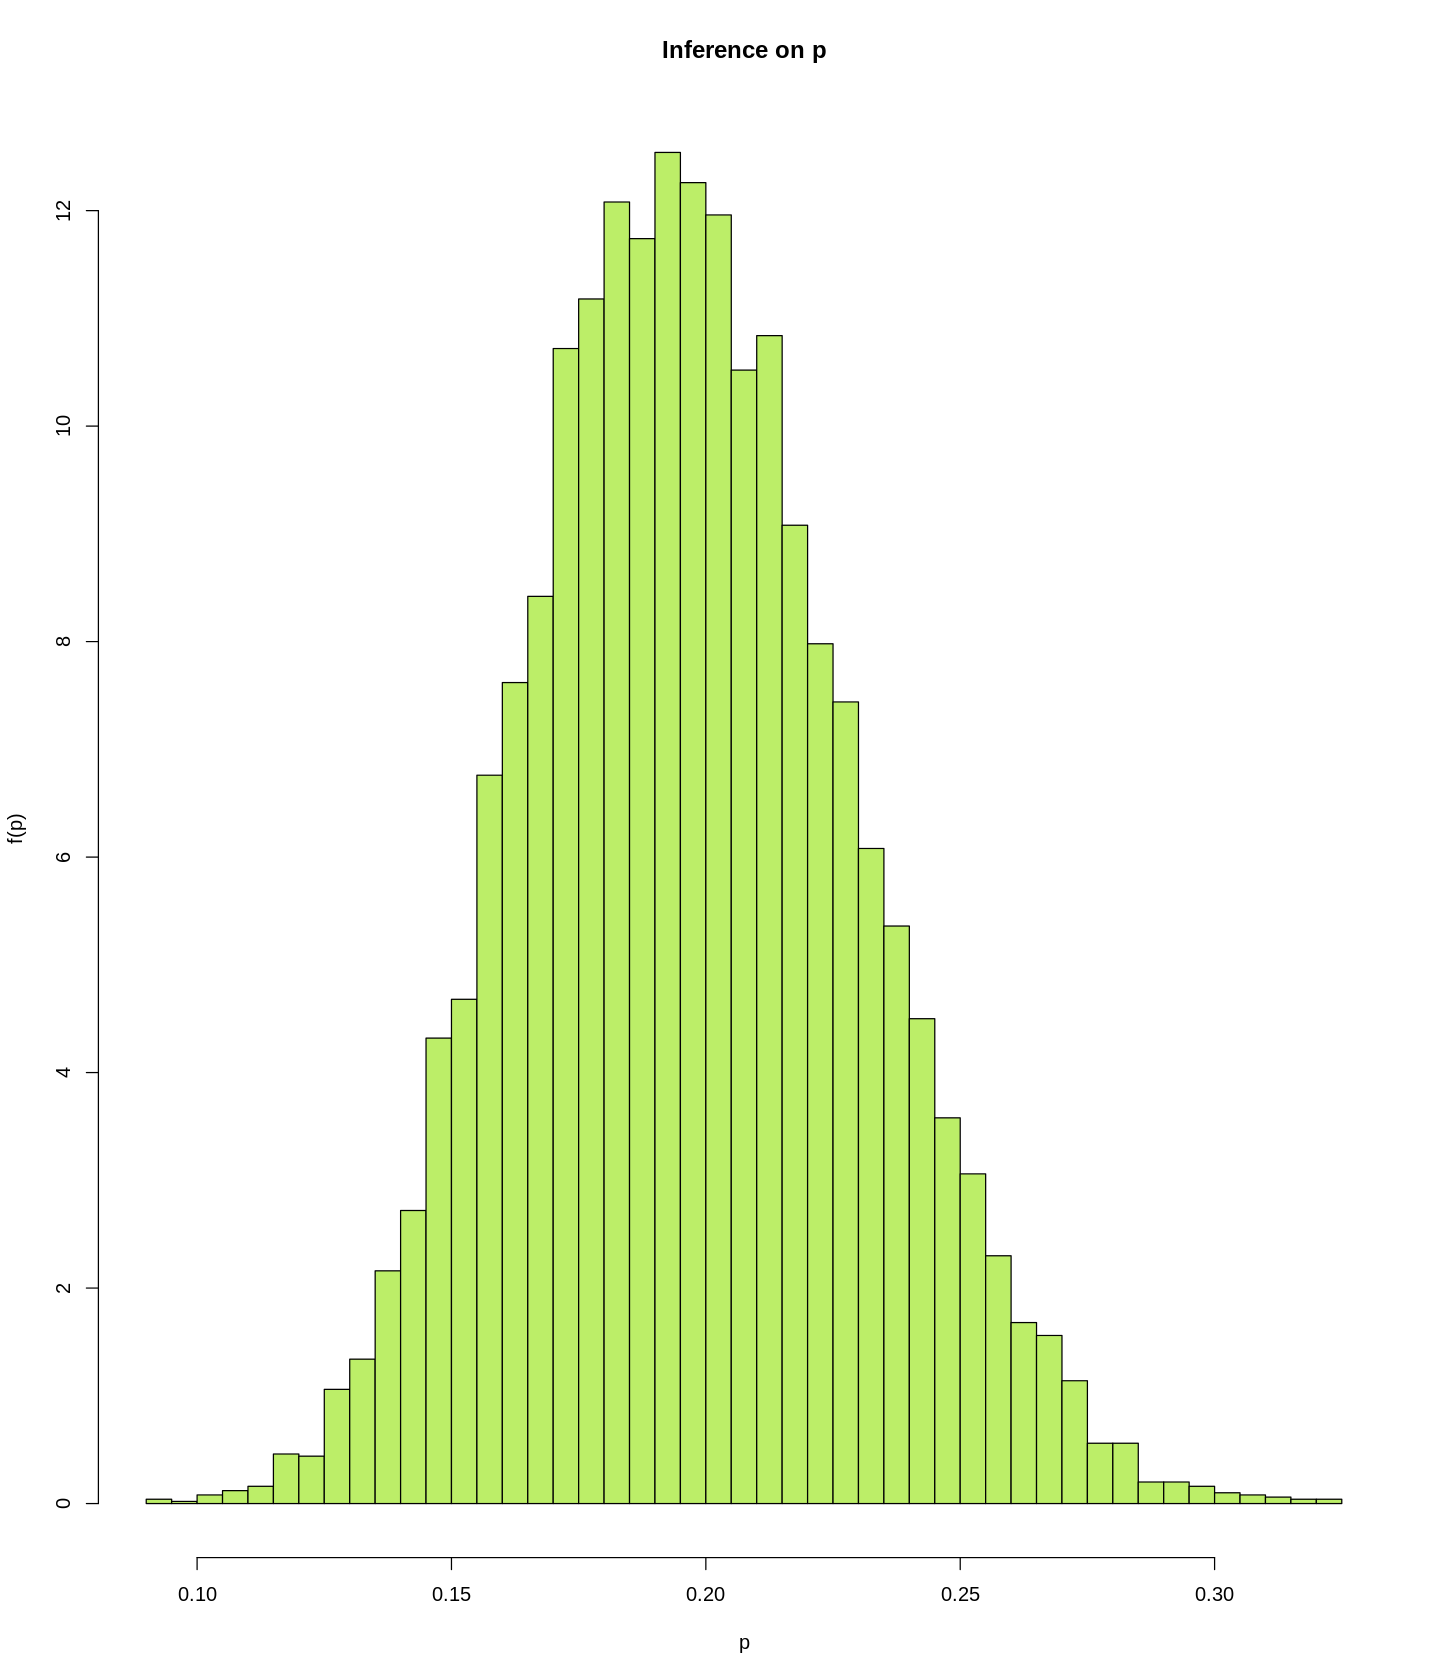

In [8]:
chain.df <- as.data.frame( as.mcmc(chain) )
hist(chain.df$p, nc=50, prob=TRUE,
     col='darkolivegreen2',xlab='p',
     ylab='f(p)', main='Inference on p')


## Exercise 2

#### Track:
Three  students  want  to  construct  their  prior  probability  about  the  proportion  of  residents  that support the building of a new concert hall in their small town.<br>
* Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.<br>
* Benny moved only recently to this new town and therefore he does non have the slightest idea about it.  Therefore he decides to use a uniform prior.<br>
* Chris believes that his prior should have a trapezoidal shape <br>
 
$$
f(X) =
  \begin{cases} 
                20x, & 0 <= x < 0.1\\
                2    & 0.1 <= x < 0.3\\
                5-10x & 0.3 <= x < 0.5\\    
                0 & otherwise
  \end{cases}
$$

1. Draw and compare the three prior distributions.

The next day the three students decide to interview a sample of 100 citizens of the small town, asking for their opinion.  Out of the interviewed sample, 26 support the building of the new concert hall.

2. Evaluate and draw the three posterior distributions.

3. Give an estimate of the most probable value and the 95% credibility interval.

#### Solution:
#### 1. Draw and compare the three prior distributions.
For the Anna' s case one need to evaluate the parameters of the beta distribution, $\alpha$ and $\beta$. 
Knowing that the expected value,$\mu = 0.2$ and the variance,$\sigma^2 = 0.08^2$ one have to solve the system:

$$
  \begin{cases} 
                \mu=\frac{\alpha}{\alpha + \beta}\\
                \sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}
  \end{cases}
$$

Doing some math, let's call $A= \frac{\mu(1-\mu)}{\sigma^2} -1$, the solution is:

$$
  \begin{cases} 
                \alpha =A\mu\\
                \beta=A(1-\mu)
  \end{cases}
$$



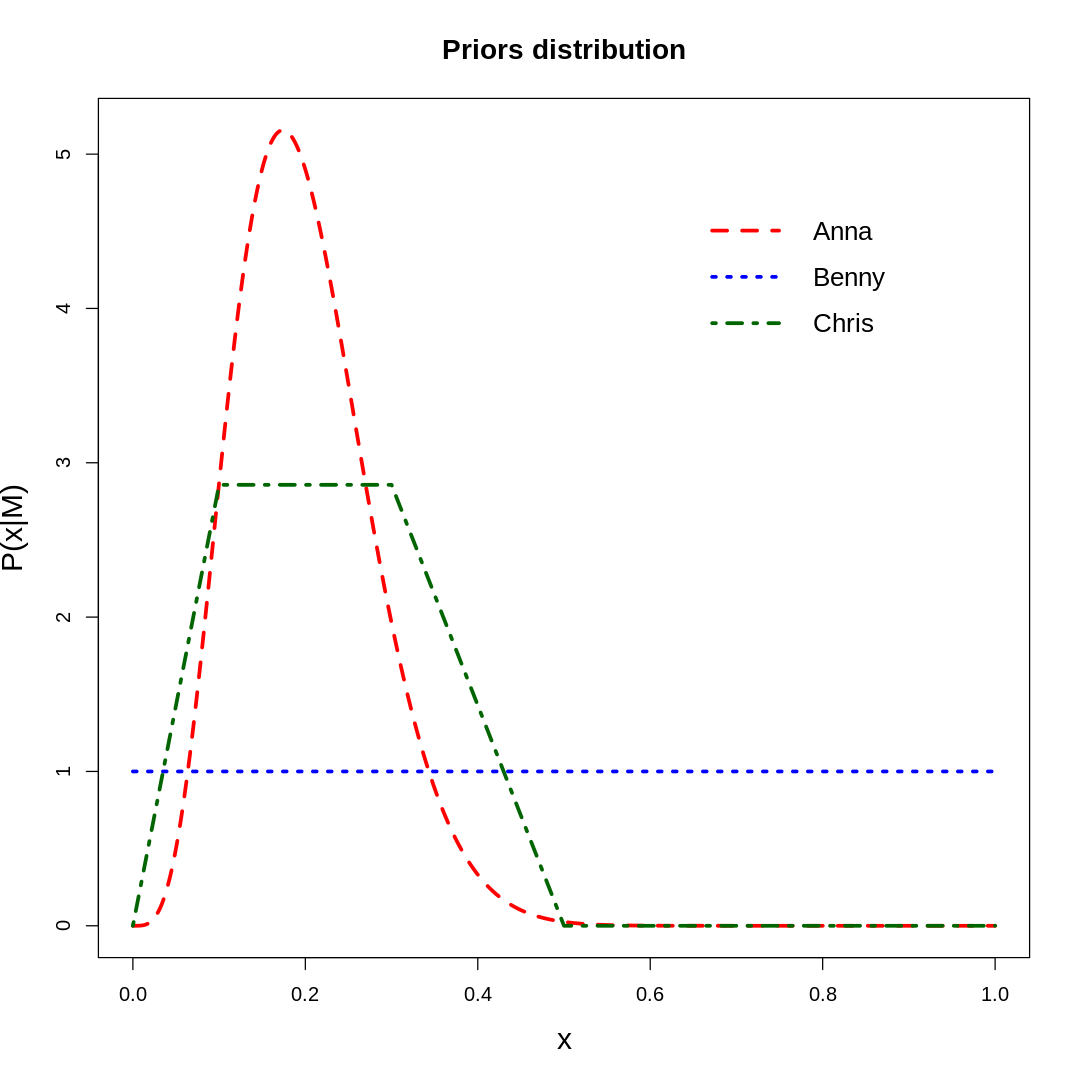

In [21]:
#parameters:
#Anna:
mu<- 0.2 ; sigma2<- 0.08^2
A<- mu*(1-mu)/sigma2
alpha<- A*mu ; beta<- A*(1-mu)

#x values: 
x_ps<- seq(0,1,0.002)

#define Priors:
A_prior<- function(x) dbeta(x,alpha,beta)

B_prior<- function(x) ifelse(x<0 | x>1,0,1) 

C_prior <-function(x){
    ifelse(x<0,0,
          ifelse(x<0.1,20*x,
                ifelse(x<0.3,2,
                      ifelse(x<0.5,5-10*x,0)
                      )
                )
          )
            
}

#plots
Cc<-integrate(C_prior, lower = 0,upper =1)$value
options(repr.plot.width=9,repr.plot.height=9)
plot(x_ps,A_prior(x_ps),
     type='l', col='red',
     xlab='x', ylab='P(x|M)',
     cex.lab=1.5,cex.main=1.4,
     main="Priors distribution",
     lty=2, lwd=3)

lines(x_ps,B_prior(x_ps),
     type='l',col='blue',
     lty=3,lwd =3)

lines(x_ps,C_prior(x_ps)/Cc,
     type='l',col='darkgreen',
     lty=4,lwd=3)

legend("topright",
       legend=c("Anna","Benny", "Chris"),
       col=c('red','blue','darkgreen'),
       lty=2:4,lwd=3,inset=0.1,
       box.lty=0,cex=1.3)

#### 2.  Evaluate and draw the three posterior distributions.

In the following, for the case of Anna and Benny I use the facts that the beta function is the conjugate prior of a binomial process(building or not) and that the uniform distribution is a special case of beta.
For Chris we compute the posterior numerically

[1] 1


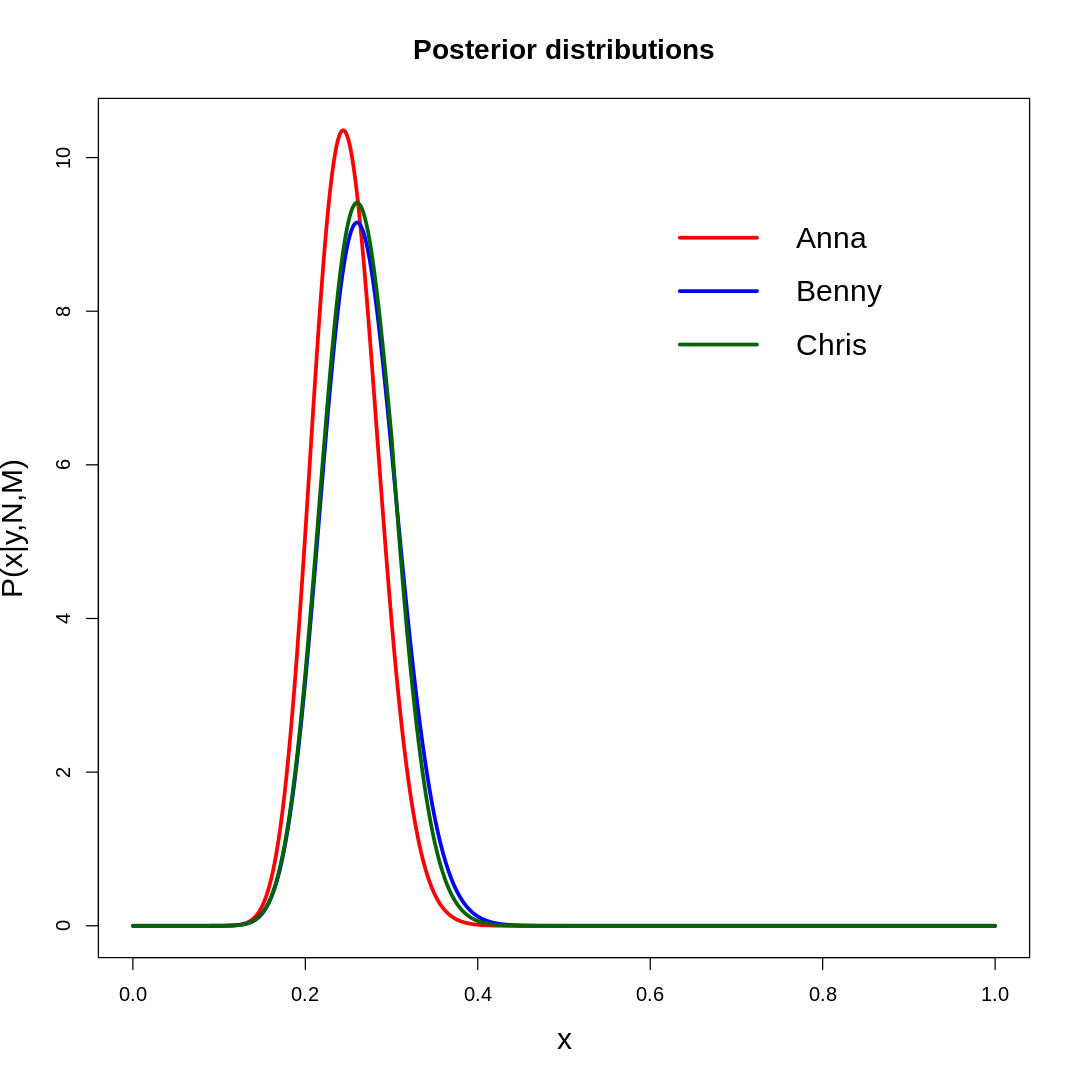

In [62]:
#using a similiar notation of the previous ex.

y<-26
N<-100

#posteriors

A_post<- function(x) dbeta(x, alpha+y,beta+N-y) 

B_post<- function(x) dbeta(x, 1+y, 1+N-y) 

#normalization factor for chris
Z<- integrate(function(x){dbinom(y, N, x)*C_prior(x)}, lower=0, upper=1)$value

C_post<- function(x) dbinom(y,N,x)*C_prior(x)/Z

Cc<-print(integrate(B_post, lower = 0,upper =1)$value)

x_pos<- seq(0,1,0.001)
#plots
options(repr.plot.width=9,repr.plot.height=9)

plot(x_pos,A_post(x_pos),
     type='l', col='red',
     xlab='x', ylab='P(x|y,N,M)',
     cex.lab=1.5,cex.main=1.4,
     main="Posterior distributions",
     lty=1, lwd=3)

lines(x_pos,B_post(x_pos),
     type='l',col='blue',
     lty=1,lwd =3)

lines(x_pos,C_post(x_pos),
     type='l',col='darkgreen',
     lty=1,lwd=3)

legend("topright",
       legend=c("Anna","Benny", "Chris"),
       col=c('red','blue','darkgreen'),
       lty=1,lwd=3,inset=0.1,
       box.lty=0,cex=1.5)

#### 3. Give an estimate of the most probable value and the 95% credibility interval.

It is estimated as the maximum of the posterior. 
For Anna and Benny it's easy since we know the analytical form of the beta function' maximum.
For a generic beta function with parameters $\alpha'$ and $\beta'$
$$
max_p= \frac{\alpha' -1}{\alpha'+\beta'-2}
$$

For Chris we can simply compute it through r function.

In order to compute the credibility interval $[ a,b]$, I build a function that starting from the max, compute a and b such that the integral of the posterior is 0.95.

In [63]:
#note: this method work because I know that the posterior
#are pretty much symmetric and are not multimodal

#for more general posteriors one can use other methods

CI<- function(post,max_post,ci=0.95){
    integ_post<-function(x) integrate(post,lower=max_post-x,upper=max_post+x)$value
    
    x<- seq(0,max_post,0.001) 
    integ_list <- sapply(x,integ_post)
    min_p<-max_post-x[which.min(abs(integ_list-ci))]
    max_p<-max_post+x[which.min(abs(integ_list-ci))]
    
    return(c(min_p,max_p))
     
}

#function that plot a posterior with the confidence interval
plot_CI<-function(post,cmm,max,name,col=c("red","blue") ){
    
    p <-seq(0,1,0.001)
    plot(p, post,
         xaxs='r', yaxs='i',
         col=col[1], type='l',
         ylim=c(0,max(post)+1),
         main = paste("Plot of ",name,"'s Posterior distribution function"),
         lwd = 3, cex.lab=1.5,cex.main=2,
         xlab="p", ylab='Density')

    x <- c(cmm[1],p[p>cmm[1] & p<cmm[2]],cmm[2])
    y <- c(0,post[which(p>cmm[1] & p<cmm[2])],0)
    polygon(x = x, y = y, col = adjustcolor(col[1],alpha.f=0.5)  )

    abline(v=max, lty=2,col=col[1])
    abline(v=cmm[1], lty=2,col=col[1])
    abline(v=cmm[2], lty=2,col=col[1])


    text(max, par("usr")[1] + 0.8, labels = TeX(sprintf("$MAX$= %0.3f",max)), pos=1, cex=1.5, col=col[2], xpd=TRUE)
    text(cmm[1], par("usr")[4] , labels = TeX(sprintf("$a$= %0.3f",cmm[1])), pos=1, cex=1.5, col=col[2], xpd=TRUE)
    text(cmm[2], par("usr")[4] , labels = TeX(sprintf("$b$= %0.3f",cmm[2])), pos=1, cex=1.5, col=col[2], xpd=TRUE)

    grid()
    
    
}



Posterior,Max_value,a,b
Anna,0.2439024,0.1679024,0.3199024
Benny,0.2600000,0.1740000,0.3460000
Chris,0.2600000,0.1790000,0.3410000


The parameters are reported in the table above

0.9507498 with absolute error < 4.7e-12

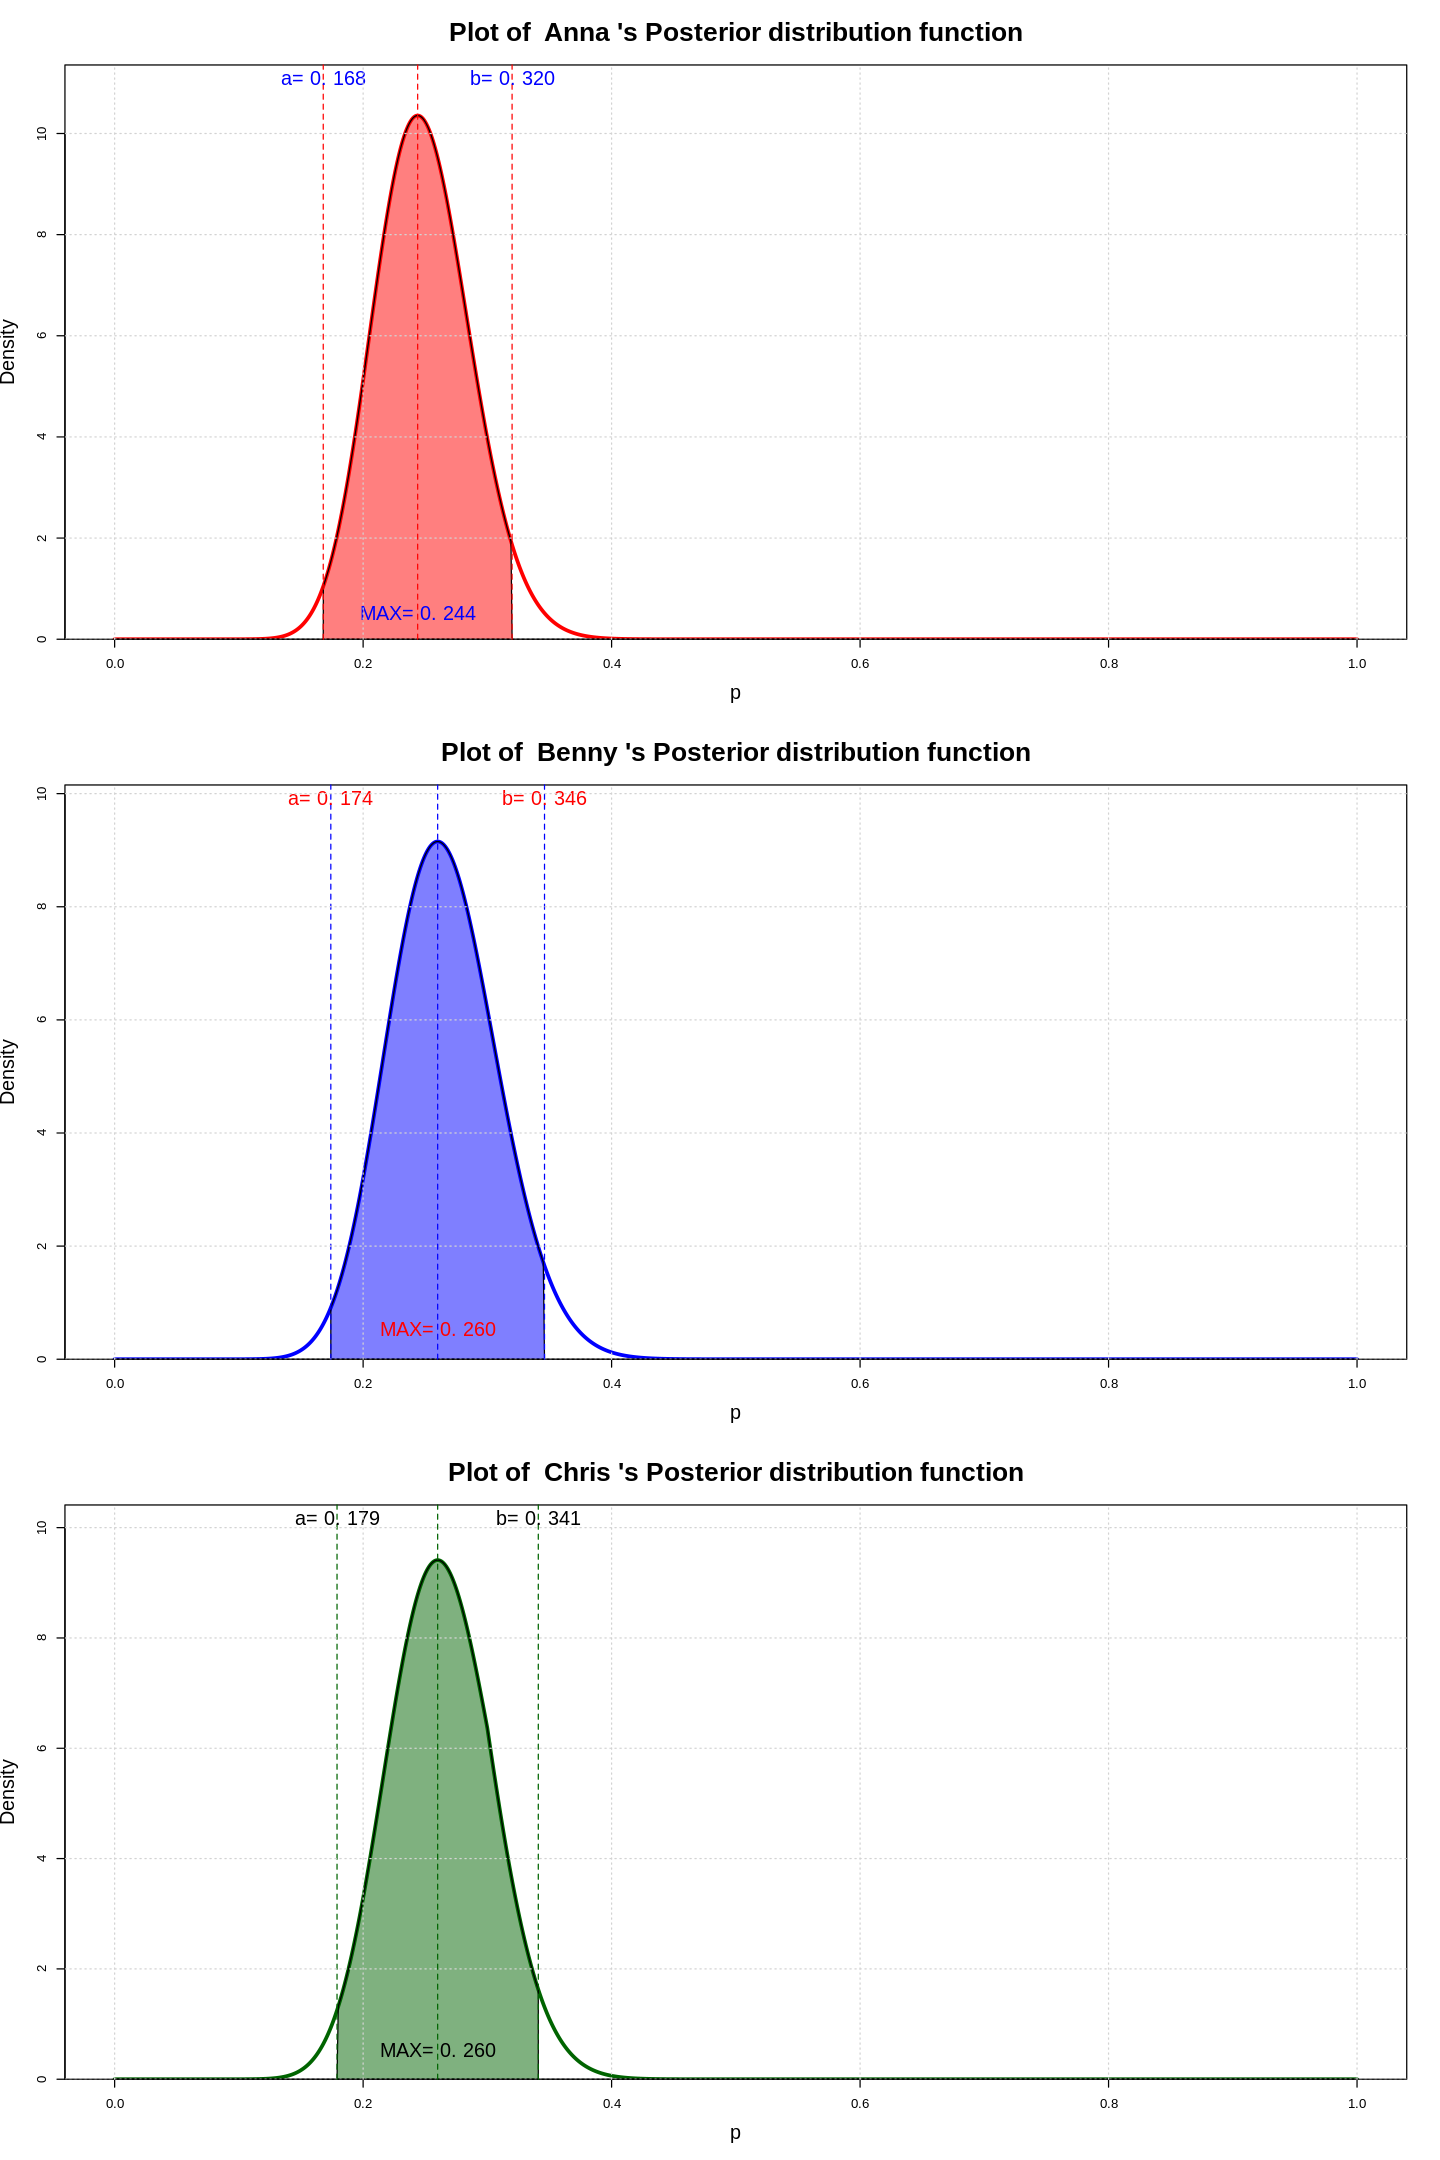

In [79]:
y<-26
N<-100

#max_values
A_max_p=(y+alpha-1)/(N+alpha+beta-2) #alpha'=alpha+y,beta'=beta+N-y
B_max_p=y/N #alpha'=1+y beta'=1+N-y

C_max_p= optimize(C_post,maximum=TRUE, interval=c(0,1))$maximum 

#credibility_intervals

cl_A<- CI(A_post,A_max_p)
cl_B<- CI(B_post,B_max_p)
cl_C<- CI(C_post,C_max_p)

#plots_
options(repr.plot.width=12,repr.plot.height=18)
par(mfrow=c(3,1)) 

plot_CI(A_post(x_pos),cl_A,A_max_p,"Anna")
plot_CI(B_post(x_pos),cl_B,B_max_p,"Benny",c("blue","red"))
plot_CI(C_post(x_pos),cl_C,C_max_p,"Chris",c("darkgreen","black"))



df_max<-data.frame(Posterior=c("Anna","Benny","Chris"),
                   Max_value=c(A_max_p,B_max_p,C_max_p),
                   a=c(cl_A[1],cl_B[1],cl_C[1]),
                   b=c(cl_A[2],cl_B[2],cl_C[2]))

df_max
cat("The parameters are reported in the table above")




In [66]:
#Bugs style#using JAGS
library(rjags)
library(coda)

mu<- 0.2 ; sigma2<- 0.08^2
A<- mu*(1-mu)/sigma2
alpha<- A*mu ; beta<- A*(1-mu)

modelStr <- "model {
    # data likelihood
    for (i in 1:length(X)) {
        X[i]~dbern(p);
    }
    
    
    # a uniform prior for p
    p~dbeta(alpha, beta);
}"
model<-"Bernoulli_processex5.bug"
writeLines(modelStr , con=model)
X<-c(rep(0,100-26),rep(1,26) )
data <- NULL
data$X <- X     # Set of observations
data$n <- length(X)    # those to be considered
data$n_next <- 10      # Predictions
data$alpha<-alpha
data$beta<-beta
data$y<-y
jm <- jags.model(model, data)
update(jm, 2000)
chain <- coda.samples(jm, c("p"),thin=10, n.iter=500000)
print(summary(chain))

Warning message in jags.model(model, data):
“Unused variable "n" in data”Warning message in jags.model(model, data):
“Unused variable "n_next" in data”Warning message in jags.model(model, data):
“Unused variable "y" in data”

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 100
   Unobserved stochastic nodes: 1
   Total graph size: 103

Initializing model


Iterations = 2010:502000
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 50000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.2484065      0.0383743      0.0001716      0.0001716 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.1772 0.2217 0.2470 0.2734 0.3273 



In [67]:
#?t.test
#t.test(data$X)$conf.int

In [80]:
library(bayestestR)
posterior <- distribution_beta(10000,alpha+y,beta-y+N)


ci_eti <- ci(rbeta(10000,alpha+y,beta-y+N), method = "HDI",ci=0.95)
ci_eti



CI,CI_low,CI_high
0.95,0.1747172,0.3260119


## Exercise 3
#### Track
A coin is flipped n= 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H <br>

1. Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.
2. Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval
3. Repeat the same analysis assuming a sequential analysis of the data.  Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e.  from 1 to 30).
4. Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis(i.e.  considering all the data as a whole) ?

#### Solution
#### 1. Plot the likelihood, prior and posterior distributions for the data set

If nH is the number of Head we get after N toss, the likelihood P(nH|p,N,M) is a binomial distribution.


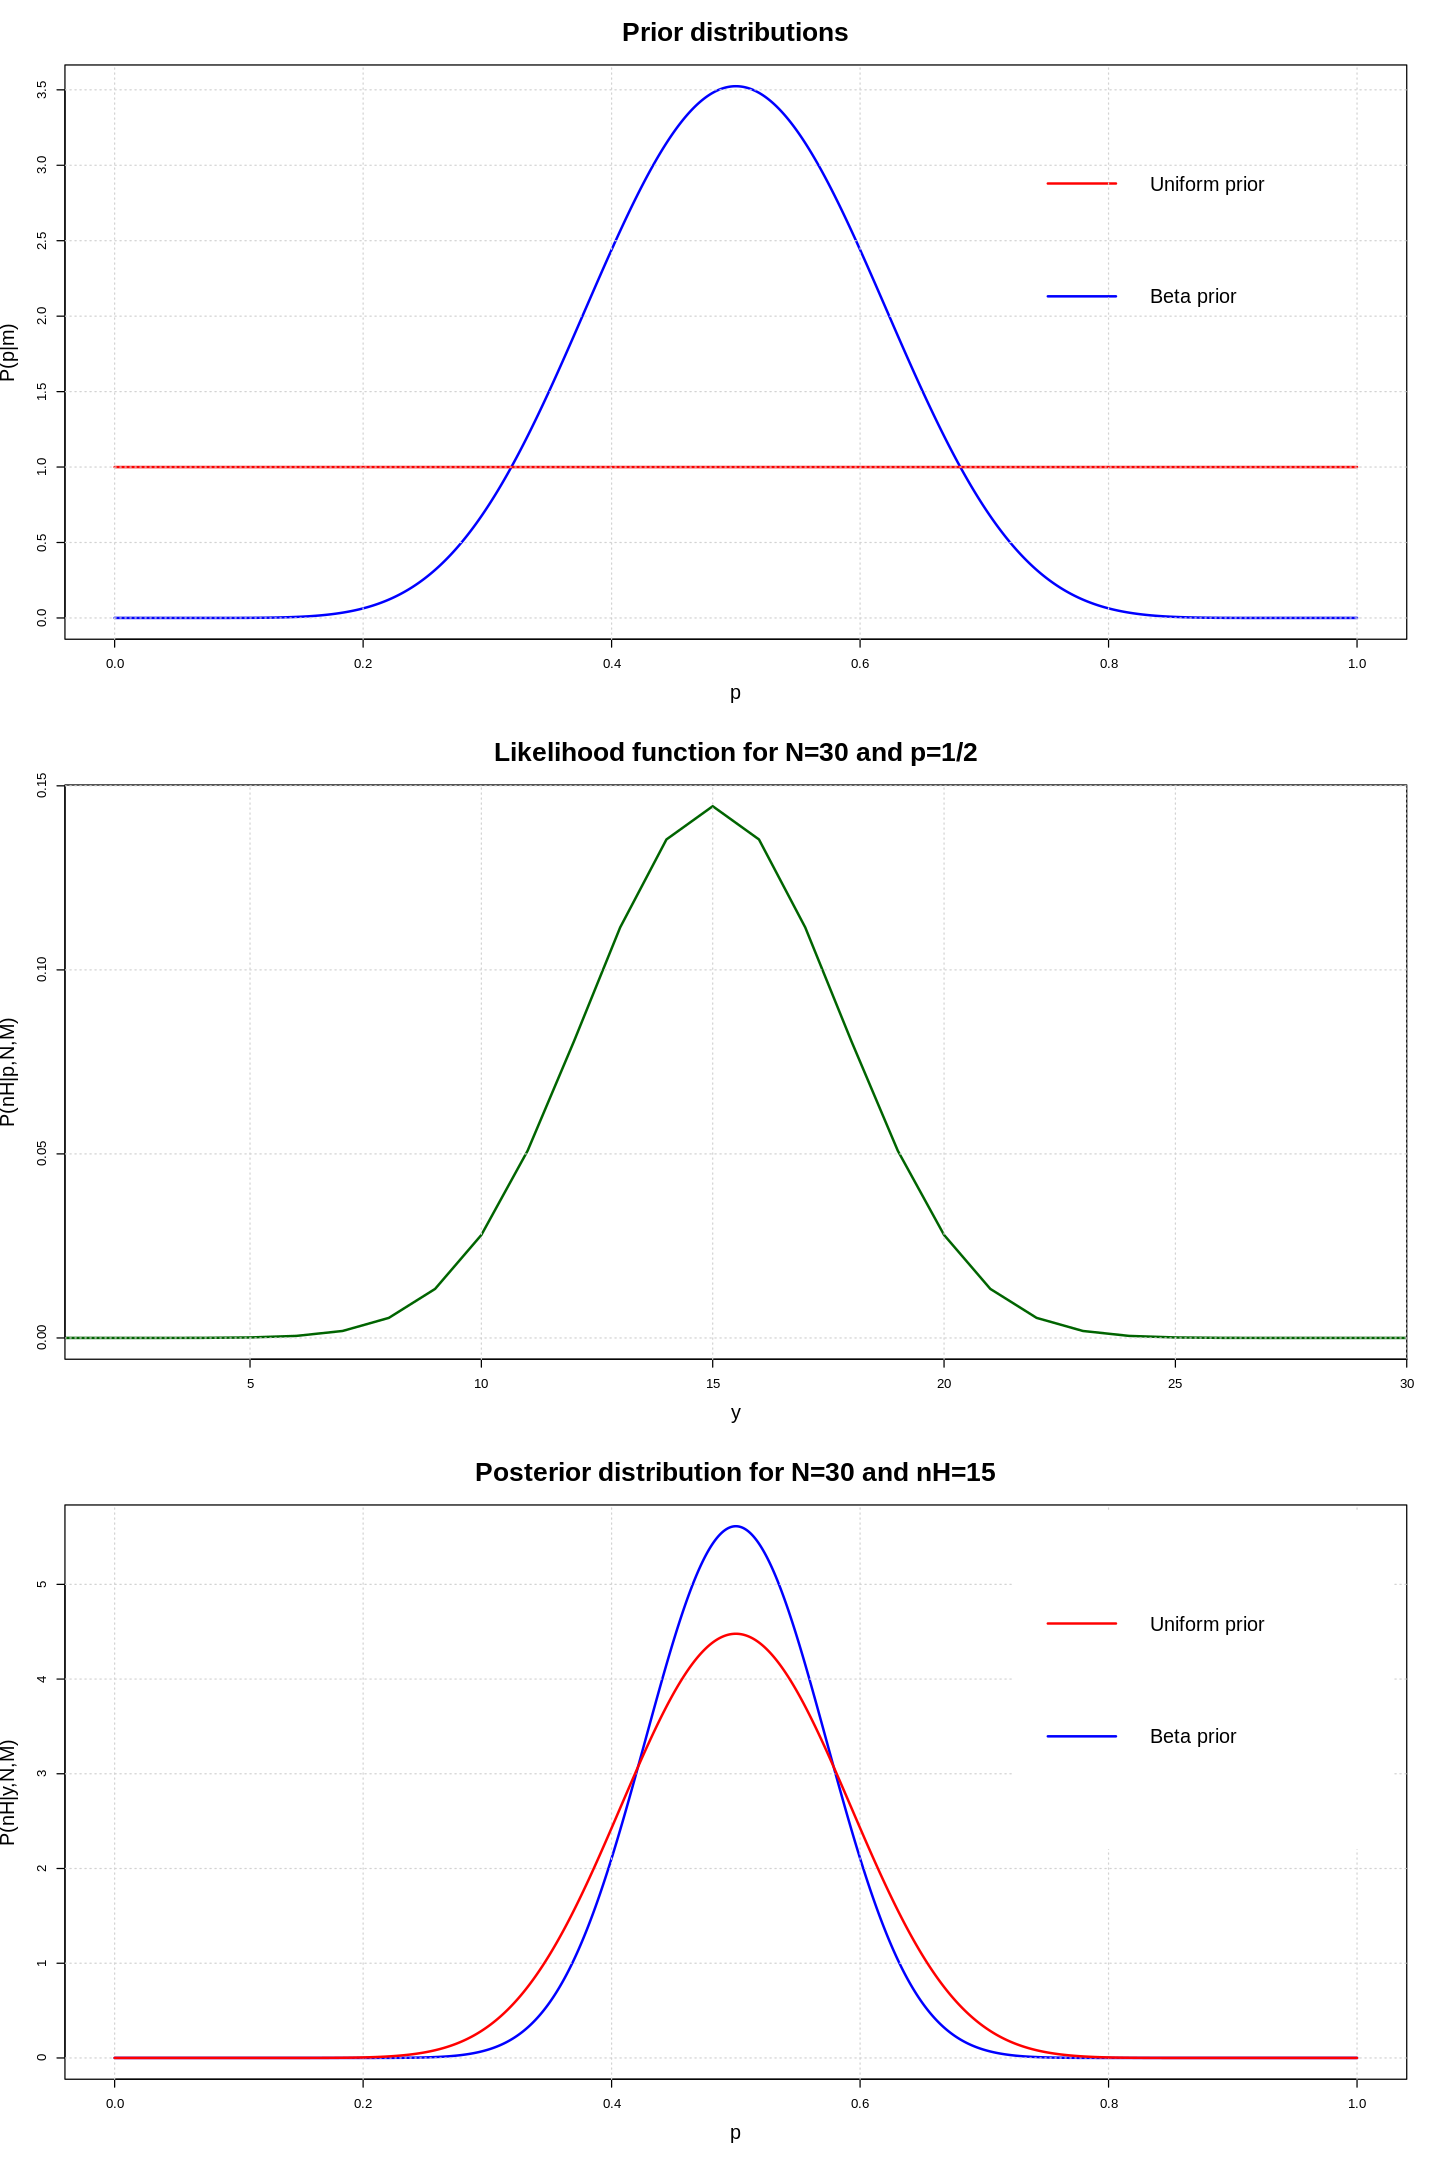

In [7]:

#set T to 1 and head to 0
T<-1
H<-0

outcomes=c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H )
N<-length(outcomes)

#so the number of T is found to be:
nT<-sum(outcomes)
nH<-N-nT

p<-nH/N

#flat prior == FP ; Beta prior == BP

x_pos <-seq(0,1,0.001)
x_lh<-1:N

options(repr.plot.width=12, repr.plot.height=18) 
par(mfrow=c(3,1))   #to make 3 plot one near to the other


#plot PRIORS

#plot BP
alpha<-10;beta<-10
plot(x_pos,dbeta(x_pos,alpha,beta),
     type='l',col='blue',
     ylab='P(p|m)',xlab='p',
     lwd=2,main="Prior distributions",
     cex.main=2,cex.lab=1.5)

#plot FP--> beta function with alpha and beta =1
lines(x_pos,dbeta(x_pos,1,1),
     col='red',type='l',lwd=2)

legend("topright",
       legend=c("Uniform prior", "Beta prior"),
       col=c('red','blue'),
       lty=1,lwd=2,inset=0.01,
       box.lty=0,cex=1.5)

grid()

#plot likelihood 
plot(x_lh,dbinom(x_lh,size=N,prob=p),
     type='l', xlab='y',xaxs='i',
     col='darkgreen',main="Likelihood function for N=30 and p=1/2",
    ylab='P(nH|p,N,M)',lwd=2,
     cex.main=2,cex.lab=1.5)
grid()


#plot posterior (BP)


plot(x_pos,dbeta(x_pos,alpha+nH, beta+N-nH) ,
     type='l', xlab='p',
     ylab='P(nH|y,N,M)',cex.main=2,
     main='Posterior distribution for N=30 and nH=15',
     col='blue', lwd=2,cex.lab=1.5)
grid()

#plot posterior (FP)
lines(x_pos,dbeta(x_pos,1+nH, 1+N-nH) ,
     type='l',lwd=2,col='red')

legend("topright",
       legend=c("Uniform prior", "Beta prior"),
       col=c('red','blue'),
       lty=1,lwd=2,inset=0.01,
       box.lty=0,cex=1.5)


#### 2. Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval
I proceed like in the previous exercise.<br>
Notice that BP refers to the Beta priors and FP to the uniform one.

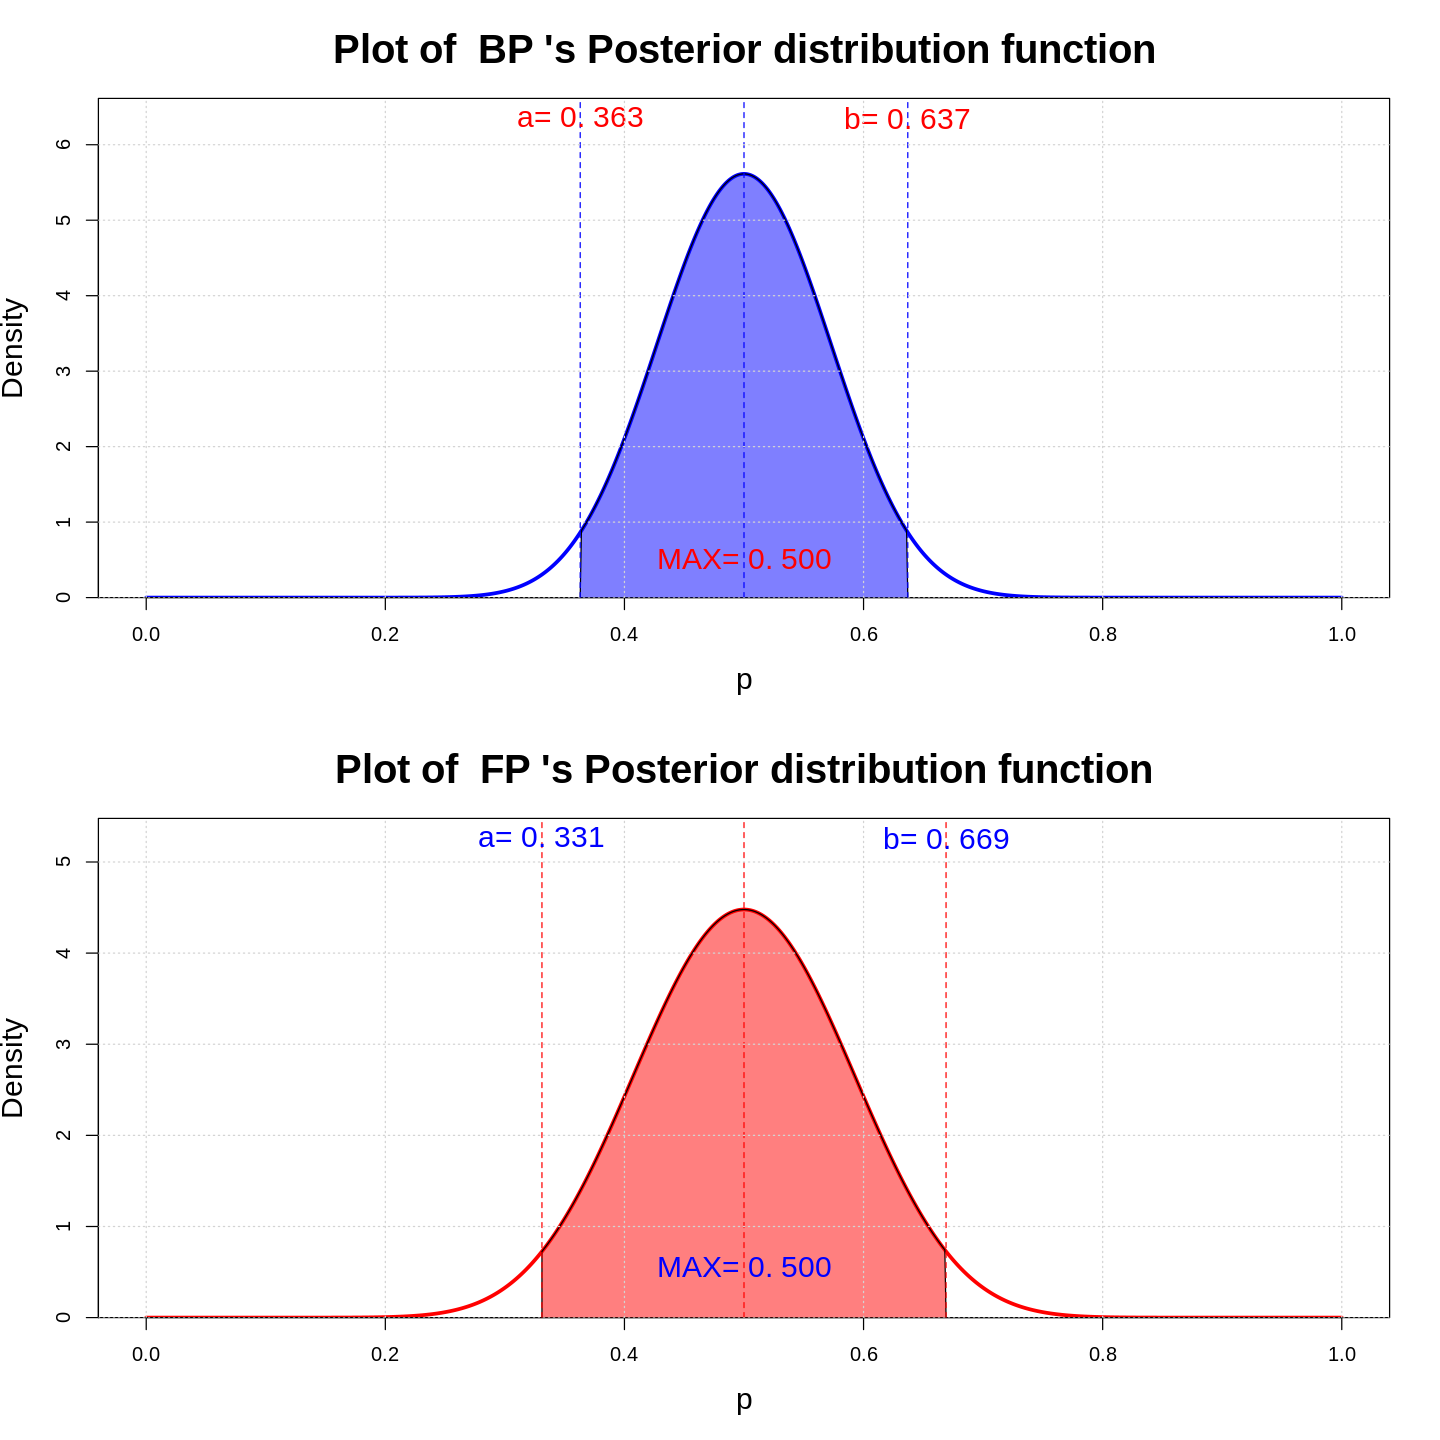

In [8]:


#i can find the max analytically:

#as before define the analytic form of the posterior
BP_post<- function(x) dbeta(x, alpha+nH,beta+N-nH) 
FP_post<- function(x) dbeta(x, 1+nH, 1+N-nH) 

BP_max_p=(nH+alpha-1)/(N+alpha+beta-2)
FP_max_p=nH/N 


cl_BP<- CI(BP_post,BP_max_p)
cl_FP<- CI(FP_post,FP_max_p)

#plot
options(repr.plot.width=12,repr.plot.height=12)
par(mfrow=c(2,1)) 


plot_CI(BP_post(x_pos),cl_BP,BP_max_p,"BP",c("blue","red"))
plot_CI(FP_post(x_pos),cl_FP,FP_max_p,"FP")



#### 3.  Assuming a sequential analysis show how the most probable value and the credibility interval change as a function of the number of coin tosses

In [9]:
#in the first tosses the posterior is not symmetric so the previous
#function to get the CI does not work properly

#Now I use linear interpolation to find the CI

CL_linear<- function(x,post, ci=0.95){
    d<-post * (x[2]-x[1])
    conf<-(1-ci)/2 #double tail
    
    for(i in 1:(length(d)-1)){
        #left tail
        if( sum(d[1:i])<conf & sum(d[1:(i+1)])>conf ){
            #interp coeff
            m<- (sum(d[1:(i+1)])-sum(d[1:i]) )/(x[i+1]-x[i])
            q<- sum(d[i:1])
            #left bound:
            a<- (conf-q)/m+x[i] 
        
        }
        
        #right tail
        if(sum(d[1:i])<(ci+conf) & sum(d[1:(i+1)])>(ci+conf)) {
            #interp coeff
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) / (x[i+1] - x[i])
            q   <- sum(d[1:i])
            #right bount
            b <- (1-conf-q)/m+x[i]
        }
        
    }
    
    return(c(a,b))
    
}


In [10]:
#we use as prior of the next step the posterior of the previous step

x<-seq(0,1,0.001); dx<-x[2]-x[1]
BP_max<-NULL
FP_max<-NULL
BP_ci<-NULL
FP_ci<-NULL

for(i in (1:N) ){
    
    #adjurn prior
    if(i!=1){
        BP_prior<-BP_posterior
        FP_prior<- FP_posterior   
    } 
    else { 
        BP_prior<-dbeta(x,alpha,beta)
        FP_prior<-dunif(x, min=0, max=1)
    }
    
    #likelihood
    lik<-dbinom(x=outcomes[i],size =1, prob=x)
    
    #adjurn posterior and normalize it
    BP_posterior_u<-lik*BP_prior
    FP_posterior_u<-lik*FP_prior

    BP_posterior<-BP_posterior_u/(dx*sum(BP_posterior_u))
    FP_posterior<-FP_posterior_u/(dx*sum(FP_posterior_u))

    #find maximum by hand:
    BP_max<-c(BP_max,x[which.max(BP_posterior)])
    FP_max<-c(FP_max,x[which.max(FP_posterior)])

    #find credibility interval:
    BP_ci<-cbind(BP_ci,CL_linear(x,BP_posterior) )
    FP_ci<-cbind(FP_ci,CL_linear(x,FP_posterior) )    
}

x_plot<-1:N
datas<-data.frame(clminBP=BP_ci[1,],clmaxBP=BP_ci[2,],maxBP=BP_max,
                 clminFP=FP_ci[1,],clmaxFP=FP_ci[2,],maxFP=FP_max,
                 toss=outcomes,stringsAsFactors= FALSE,N=x_plot)
#datas


clminBP,clmaxBP,maxBP,clminFP,clmaxFP,maxFP,toss,N
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.3147773,0.7275437,0.526,0.1576930,0.9874145,1.000,1,1
0.3397051,0.7423709,0.550,0.2920481,0.9915918,1.000,1,2
0.3630473,0.7556397,0.571,0.3973336,0.9936871,1.000,1,3
0.3849190,0.7675875,0.591,0.4779153,0.9949466,1.000,1,4
0.4054348,0.7784049,0.609,0.5405114,0.9957867,1.000,1,5
0.3861530,0.7554782,0.583,0.4207761,0.9628056,0.833,0,6
0.4052067,0.7659773,0.600,0.4729904,0.9676447,0.857,1,7
0.4231789,0.7756046,0.615,0.5170035,0.9713536,0.875,1,8
0.4052670,0.7548764,0.593,0.4434036,0.9327616,0.778,0,9


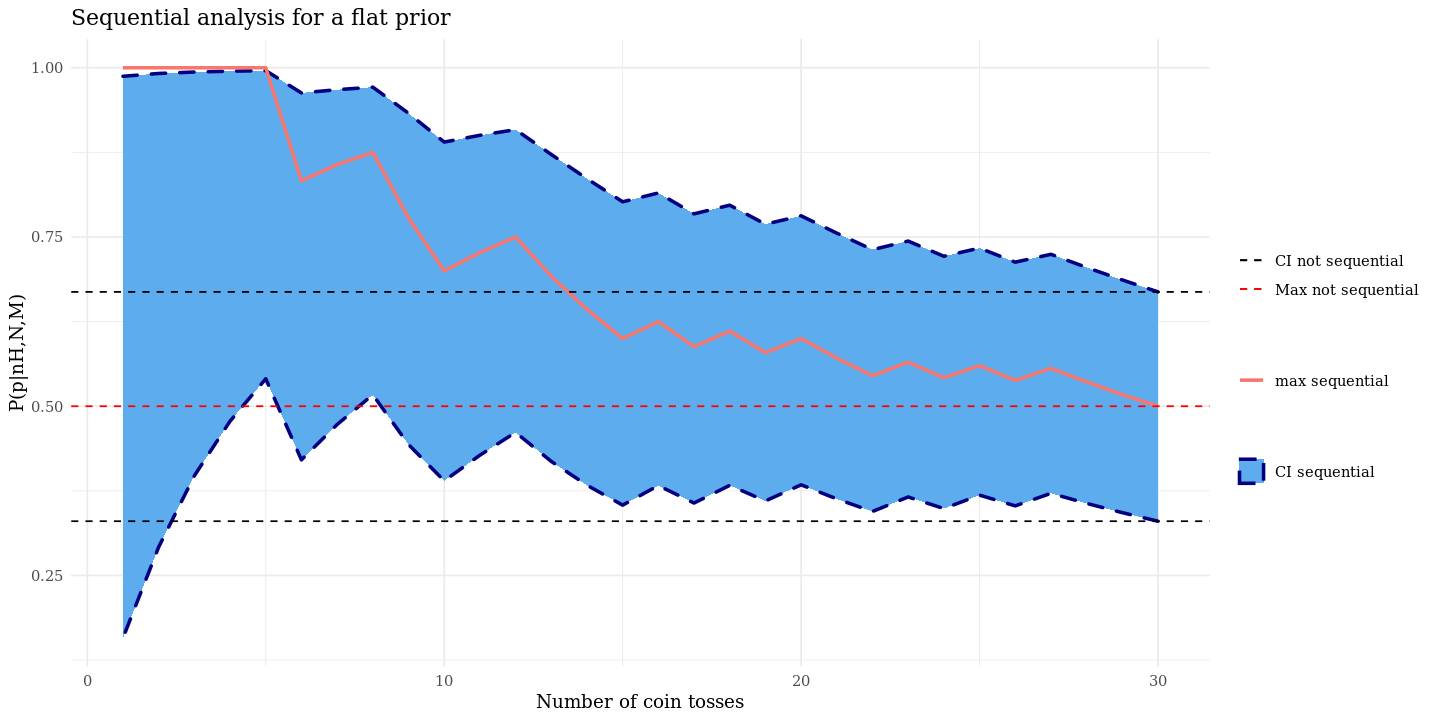

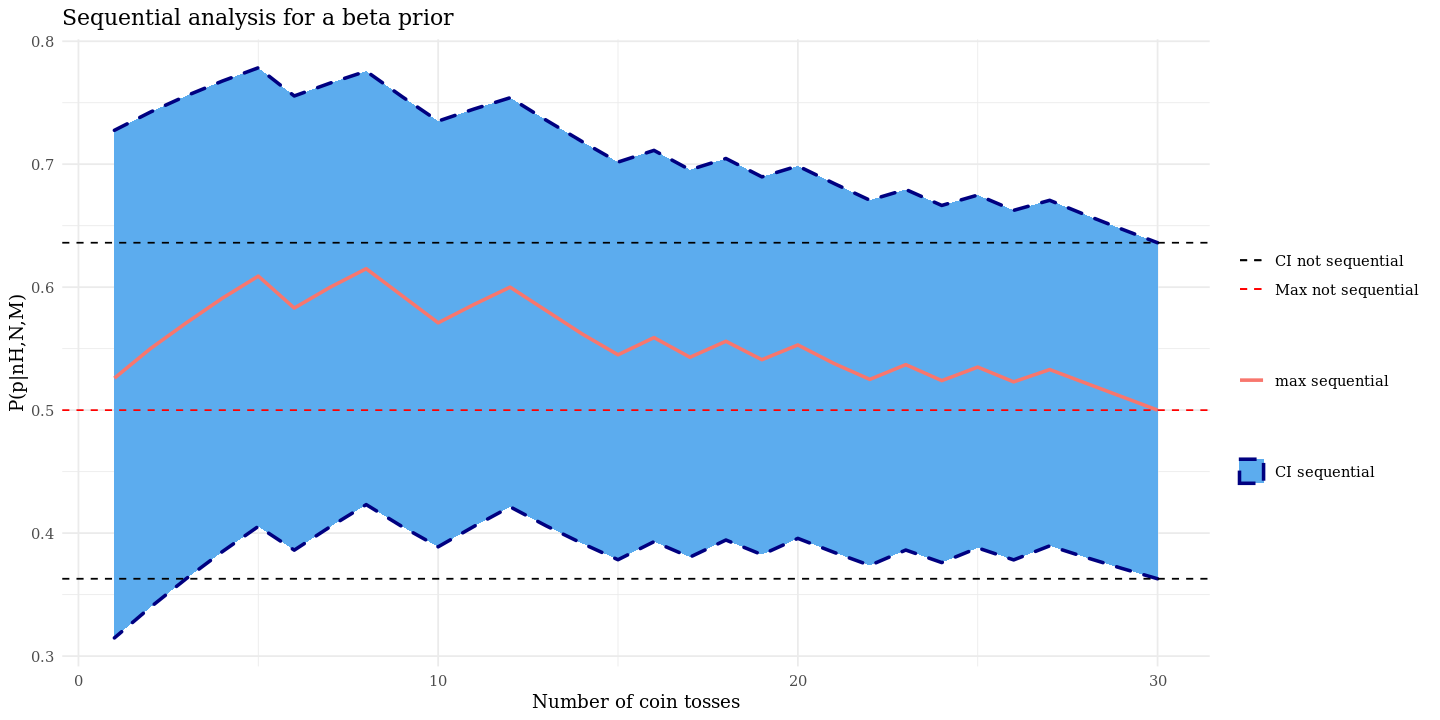

In [11]:
# now let's plot the results

#not sequential parameters
abBP<-CL_linear(x,dbeta(x, alpha+nH,beta+N-nH))
abFP<-CL_linear(x,dbeta(x, 1+nH,1+N-nH))

BP_max_p=(nH+alpha-1)/(N+alpha+beta-2)
FP_max_p=nH/N 




options(repr.plot.width=12, repr.plot.height=6)

#FLAT PRIOR
datas %>% ggplot()+
    geom_ribbon(aes(N,maxFP,ymin=clminFP, ymax=clmaxFP,fill='CI sequential'),
                colour='navy',lwd=1,lty=2 )+
    geom_line(aes(N,maxFP,colour='red'),lwd=1)+
    geom_hline(aes(yintercept=abFP[1],linetype="CI not sequential" ),colour = "black")+
    geom_hline(aes(yintercept=abFP[2]),colour = "black",linetype="dashed") +
    geom_hline(aes(yintercept=FP_max_p,linetype="Max not sequential"),colour = "red") +
    labs(title="Sequential analysis for a flat prior" ,
         x = "Number of coin tosses",
         y = "P(p|nH,N,M)") +
    theme_minimal()+
    theme(text = element_text(family = "Garamond") )+
    scale_color_discrete(name = "", labels = c("max sequential", ""))+
    scale_linetype_manual(name = "", values = c(2, 2), 
                      guide = guide_legend(override.aes = list(color = c("black", "red"))))+
  scale_fill_manual(name = '',  values=c("CI sequential" = "steelblue2"))

  
#BETA PRIOR

datas %>% ggplot()+
    geom_ribbon(aes(N,maxBP,ymin=clminBP, ymax=clmaxBP,fill='CI sequential'),
                colour='navy',lwd=1,lty=2 )+
    geom_line(aes(N,maxBP,colour='red'),lwd=1)+
    geom_hline(aes(yintercept=abBP[1],linetype="CI not sequential" ),colour = "black")+
    geom_hline(aes(yintercept=abBP[2]),colour = "black",linetype="dashed") +
    geom_hline(aes(yintercept=BP_max_p,linetype="Max not sequential"),colour = "red") +
    labs(title="Sequential analysis for a beta prior" ,
         x = "Number of coin tosses",
         y = "P(p|nH,N,M)") +
    theme_minimal()+
    theme(text = element_text(family = "Garamond") )+
    scale_color_discrete(name = "", labels = c("max sequential", ""))+
    scale_linetype_manual(name = "", values = c(2, 2), 
                      guide = guide_legend(override.aes = list(color = c("black", "red"))))+
  scale_fill_manual(name = '',  values=c("CI sequential" = "steelblue2"))

    


#### Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis?
As we can see in the graphs above we get the same result. This confirm the expectation.